In [1]:
from numpy import array

In [2]:
anisotropy_row = array([0.219, 0.202, 0.186, 0.169, 0.152, 0.095, 0.077, 0.065, 0.065, 0.048])
arp23_concentration_row = array([6, 3, 1.5, 0.75, 0.375, 0.125, 0.0625, 0.0625 / 2, 0.0625 / 4, 0])

In [3]:
from numpy import min, max
bound_dna_row = anisotropy_row - min(anisotropy_row)
bound_dna_row = bound_dna_row / max(bound_dna_row)

In [4]:
%matplotlib inline
from matplotlib.pyplot import subplots

In [5]:
from scipy.optimize import curve_fit
from numpy import sqrt

In [6]:
def bound_dna(arp23_concentration, dissociation_constant, hill_coefficient):
    bound_dna_concentration = arp23_concentration**hill_coefficient / (arp23_concentration**hill_coefficient + dissociation_constant)
    return bound_dna_concentration

def bound_dna_quad(arp23_concentration, dissociation_constant):
    bound_dna_concentration = 0.5 * (dissociation_constant + arp23_concentration + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.010)**2 - 
                                            4 * arp23_concentration * 0.010)) / 0.010
    return bound_dna_concentration

In [7]:
popt, pcov = curve_fit(bound_dna_quad, arp23_concentration_row, bound_dna_row, p0 = 0.3)

Text(0.5,0,'Arp2/3 complex ($\\mu$M)')

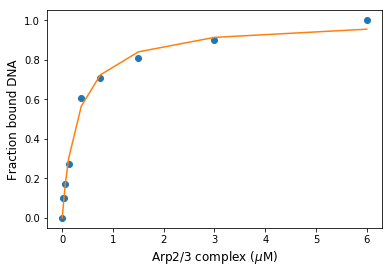

In [8]:
figure_handle, axes_handle = subplots()
axes_handle.plot(arp23_concentration_row, bound_dna_row, 'o')
axes_handle.plot(arp23_concentration_row, bound_dna_quad(arp23_concentration_row, *popt))
axes_handle.set_ylabel(r'Fraction bound DNA', fontsize = 12)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 12)

In [9]:
from numpy import sqrt, diag
variance_row = sqrt(diag(pcov))
print(popt)
print(variance_row)

[0.28381401]
[0.01960193]
